<a href="https://colab.research.google.com/github/britt-klose/GenAI-HW2/blob/main/H2Problem1FinalMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brittany Klose GENAI HW-2

**Part 1:** **Data** **Preprocessing**

* Load the CIFAR-10 dataset using the appropriate function from tf.keras.datasets.

* Normalize the images by dividing by 255.0.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets

In [39]:
#@title Parameters
NUM_CLASSES = 10

In [40]:
#@title Prepare the Data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [41]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [42]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


**Part 2:** **MLP Model**

* Declare the function: **def create_mlp_model(input_shape)**
*  Have the function create an **MLP model** using **Sequential** and add layers using **Flatten** and **Dense** from *tf.keras.layers*.
* **Add Dropout layers:** Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which helps the model generalize better.
* Compile the MLP model with an optimizer and loss function (**adam** and **sparse_categorical_crossentropy**).
* Train the MLP model using the **fit **method and include validation split.

**Part 4:** **Evaluation**

* Evaluate both models on the test set using the *evaluate* method.

**Part 5:** **Plotting Results**

* **Plot the validation accuracy** for both models using *matplotlib.pyplot.*
* **Plot the training accuracy** for both models using *matplotlib.pyplot.*

In [43]:
#@title MLP Model

#################################################
#          2. Building the model
#################################################
def create_mlp_model():

  # Using Sequential model
    model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
  ])
    model.summary()


    # Compile model
    opt = optimizers.Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    #####################################################
    #         Training the Model with .fit()
    #####################################################
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)


  #####################################################
  #        4. Evaluating the Model
  #####################################################
    model.evaluate(x_test, y_test)

    CLASSES = np.array(
        [
            "airplane",
            "automobile",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]
    )

    preds = model.predict(x_test)
    preds_single = CLASSES[np.argmax(preds, axis=-1)]
    actual_single = CLASSES[np.argmax(y_test, axis=-1)]


  #####################################################
  #        5. Plotting the Model
  #####################################################

    n_to_show = 10
    indices = np.random.choice(range(len(x_test)), n_to_show)

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, idx in enumerate(indices):
      img = x_test[idx]
      ax = fig.add_subplot(1, n_to_show, i + 1)
      ax.axis("off")
      ax.text(
          0.5,
          -0.35,
          "pred = " + str(preds_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.text(
          0.5,
          -0.7,
          "act = " + str(actual_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.imshow(img)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 200)               614600    
                                                                 
 dense_22 (Dense)            (None, 150)               30150     
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1563/15

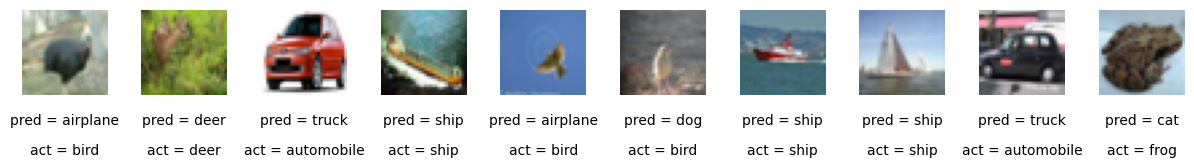

In [44]:
create_mlp_model()